# DataViz

Importez la bibliothèque matplotlib et représentez un graphique simple avec plt.plot (plt.show() aussi)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Représentez plusierus nuages de points sur le même graphique et modifiez les axes


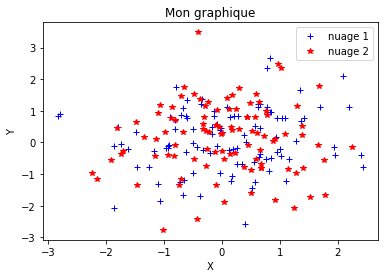

In [2]:
plt.plot(np.random.randn(100),np.random.randn(100),"+b",label="nuage 1")
plt.plot(np.random.randn(100),np.random.randn(100),"*r",label="nuage 2")
plt.title("Mon graphique")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
#plt.show()

A partir d’un jeu de données, représentez un nuage de points basé sur deux variables continues


In [3]:
communes_idf=pd.read_csv("../Data/base-dpt.csv",sep=";")

In [4]:
communes_idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 38 columns):
CODGEO           1300 non-null int64
LIBGEO           1300 non-null object
REG              1300 non-null int64
DEP              1300 non-null int64
P14_POP          1297 non-null float64
P09_POP          1297 non-null float64
SUPERF           1297 non-null float64
NAIS0914         1297 non-null float64
DECE0914         1297 non-null float64
P14_MEN          1297 non-null float64
NAISD16          1296 non-null float64
DECESD16         1296 non-null float64
P14_LOG          1297 non-null float64
P14_RP           1297 non-null float64
P14_RSECOCC      1297 non-null float64
P14_LOGVAC       1297 non-null float64
P14_RP_PROP      1297 non-null float64
NBMENFISC14      1280 non-null float64
PIMP14           561 non-null float64
MED14            1280 non-null float64
TP6014           462 non-null float64
P14_EMPLT        1297 non-null float64
P14_EMPLT_SAL    1297 non-null float64
P09_E

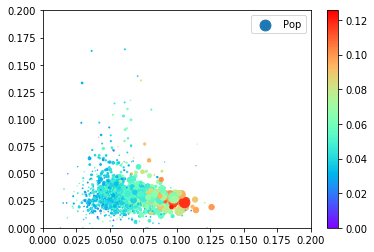

In [5]:
communes_idf
plt.scatter(communes_idf["NAIS0914"]/communes_idf["P14_POP"],
           communes_idf["DECE0914"]/communes_idf["P14_POP"],s=communes_idf["P14_POP"]/1000,
           c=communes_idf["P14_CHOM1564"]/communes_idf["P14_POP"], cmap=plt.get_cmap("rainbow"))
plt.axis([0,0.2,0,0.2])
plt.legend(["Pop"])
plt.colorbar()

Générez un histogramme à partir des données


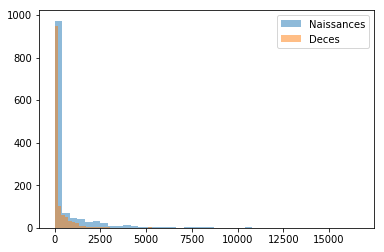

In [6]:
plt.hist(communes_idf["NAIS0914"].dropna(),bins=40,label="Naissances",alpha=0.5)
plt.hist(communes_idf["DECE0914"].dropna(),bins=40, label="Deces",alpha=0.5)
plt.legend()
#communes_idf["NAIS0914"].fillna(communes_idf["NAIS0914"].median())

Représentez les variables sous forme de Box-plot


Text(0.5,1,'Box plot du nombre de naissance par habitant par département')

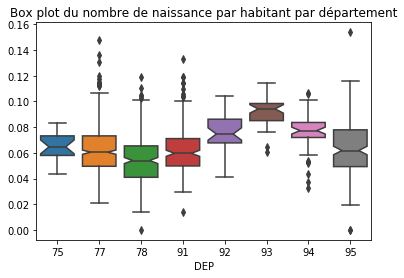

In [7]:
sns.boxplot(communes_idf["DEP"],communes_idf["NAIS0914"]/communes_idf["P09_POP"],notch=True)
plt.title("Box plot du nombre de naissance par habitant par département")

In [8]:
# on a une commune problématique
communes_idf.loc[(communes_idf["DECE0914"]/communes_idf["P09_POP"]).idxmax()]

CODGEO                                                       77489
LIBGEO                                             Vaux-sur-Lunain
REG                                                             11
DEP                                                             77
P14_POP                                                        204
P09_POP                                                        197
SUPERF                                                        8.47
NAIS0914                                                         7
DECE0914                                                       123
P14_MEN                                                    53.0461
NAISD16                                                          3
DECESD16                                                        17
P14_LOG                                                    88.6371
P14_RP                                                     53.0461
P14_RSECOCC                                                25.

## La Californie en graphique

In [11]:
frame_housing=pd.read_csv("../Data/housing.csv")

C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


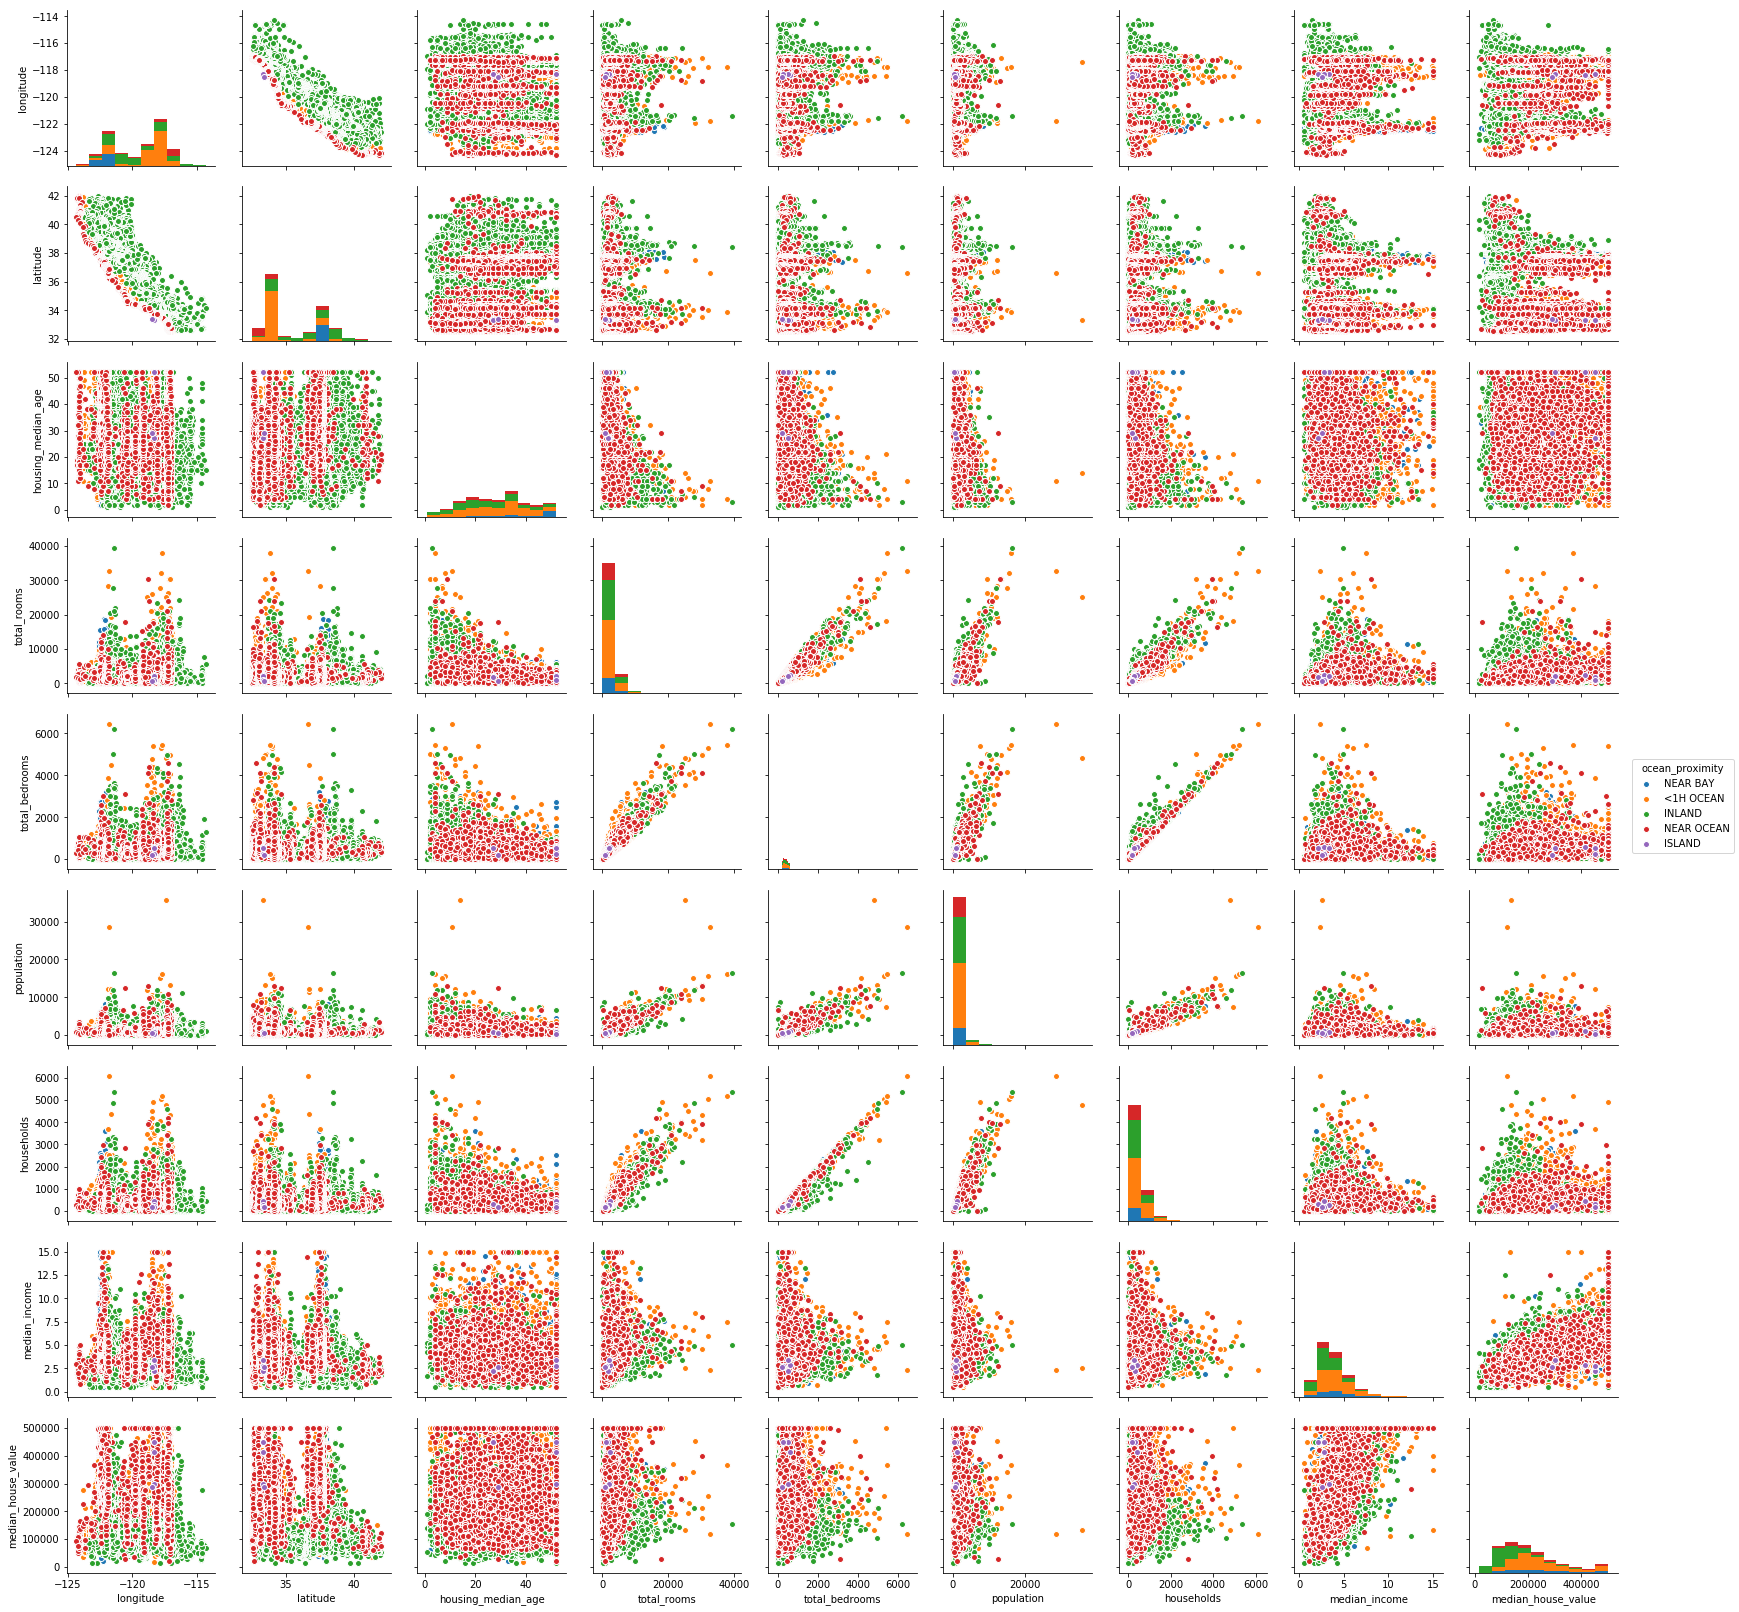

In [12]:
sns.pairplot(frame_housing,hue="ocean_proximity")
plt.savefig("pairplot.png")

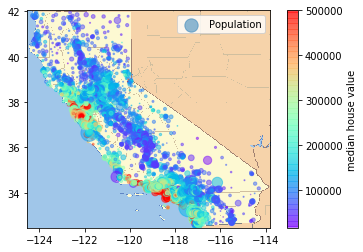

In [13]:
californie=plt.imread("../Data/california.png")
plt.scatter("longitude","latitude",data=frame_housing,c="median_house_value",
            s=frame_housing["population"]/100,
           cmap=plt.get_cmap("rainbow"),alpha=0.5)
plt.colorbar().ax.set_ylabel('median house value')

plt.legend(["Population"])
plt.imshow(californie,extent=[-124.55, -113.80, 32.45, 42.05])